# 导包

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno

# from numpy import NaN, nan, NAN

# 1. 缺失值初始及判断

In [ ]:
# 在Pandas中, 缺失值用NaN, nan, NAN这三个来表示, 它们都是一样的, 不是'', False, 0等, 表示: 什么都没有(缺失)
# 1. 缺失值不是 False, 空, 0等.
print(np.NaN == True)  # False
print(np.NaN == False)  # False
print(np.NaN == 0)  # False
print(np.NaN == ' ')  # False

In [ ]:
# 2. 缺失值是无意义的, 所以: NaN, nan, NAN之间也不能直接用 == 比较
print(np.NaN == np.nan)  # False
print(np.NaN == np.NAN)  # False
print(np.nan == np.NAN)  # False

In [ ]:
# 3. 那如何判断缺失值呢? 可以通过 pandas的API实现.
# isnull() 和 isna() 效果一致, 即: 判断是否为空
print(pd.isnull(np.NaN))  # True
print(pd.isnull(np.nan))  # True
print(pd.isnull(np.nan))  # True

print(pd.isna(np.NaN))  # True
print(pd.isna(np.nan))  # True
print(pd.isna(np.nan))  # True

In [ ]:
# notnull() 和 notna()效果一致, 即: 判断是否不为空.
print(pd.notnull(np.NaN))  # False
print(pd.notnull(np.nan))  # False
print(pd.notnull(np.nan))  # False

print(pd.notna(np.NaN))  # False
print(pd.notna(np.nan))  # False
print(pd.notna(np.nan))  # False

In [ ]:
# 4. 上述的4个函数, 还可以直接判断值.
print(pd.isnull(10))  # False
print(pd.isnull('abc'))  # False

print(pd.notnull(10))  # True
print(pd.notnull('abc'))  # True

# 2. 演示加载缺失值

In [ ]:
# 1. 加载数据, 包括缺失值.
pd.read_csv('data/survey_visited.csv')

# 2. 加载数据时, 忽略缺失值(有缺失值的行) , 即: 用 '' 来填充
pd.read_csv('data/survey_visited.csv', keep_default_na=False)  # keep_default_na: 是否加载缺失值, True:加载, False: 不加载

# 3. 加载数据时, 手动指定某些值为: 空值        na_values=[值1, 值2...] 只要出现到这里的值, 都会用NaN来填充
pd.read_csv('data/survey_visited.csv', keep_default_na=False, na_values=['619', '734', 'DR-3', '1927-02-10'])

# 3. 如何处理缺失值

## 3.1 加载数据源 及 缺失值的可视化

In [ ]:
# 1. 加载数据源.
df = pd.read_csv('data/titanic_train.csv')
df.head()

In [ ]:
# 2. 查看数据的相关信息.
df.shape  # (891, 12)
df.info()  # 基本信息
df.describe()  # 统计信息

In [ ]:
# 3. 查看是否获取数据.
df['Survived'].value_counts()  # 多少人获救, 多少人离去...   0: 没获救, 1: 已获救

In [ ]:
# 4. 缺失值的可视化, 查看下缺失值的分布情况.  查看下缺失值的关系(关联性)
# 如果你电脑没有安装 missingno这个包, 需要: pip install missingno 先装一下.

# 绘制柱状图, 查看缺失值的分布情况.
msno.bar(df)

# 查看下缺失值的关系(关联性), 例如: A字段缺失, B字段会不会缺失等. 
msno.heatmap(df)

## 3.2 缺失值处理方式1: 删除缺失值

In [ ]:
# 1. 查看各列的(空值)数据统计情况.
df.isnull().sum()

# 2. 删除缺失值. 如果缺失值比较少的情况下, 可以这样来做.
# 参数解释: axis=0(默认), 代表: 行,     how:是删除方式, any(任意1个为空), all(都要为空)        subset=[列1, 列2] 表示参考哪些列(的空值)
df.dropna(how='any')                      # 只要该行为空, 就删除该行. 
df.dropna(how='all')                      # 该行都为空, 就删除该行.  
df.dropna(how='any', subset=['Age'])      # 只参考Age列, 只要为空, 就删除该行.  

df.dropna(how='any', axis=1)              # 0: 行, 1: 列, 只要该列有空值, 就删除该列.  删除列要慎重.

## 3.3 缺失值处理方式2: 非时间序列数据(固定值)

In [ ]:
# 1. 查看各列的(空值)数据统计情况.
df.isnull().sum()

# 2. fillna()函数, 实现填充缺失值.
df.fillna(0).isnull().sum()

# 3. 实际开发中, 我们一般不会直接随便写1个固定值, 而是用 该列的 平均值, 中位数, 标准差, 最大值, 最小值等来填充. 
# 需求: 针对于Age列的数据, 使用 Age列的平均值 来填充
df.Age.mean()   # 29.69911764705882
df.Age.fillna(df.Age.mean(), inplace=True)        # fillna() 有 inplace参数. 

# 4. 填充后, 查看统计信息.
df.isnull().sum()

## 3.4 缺失值处理方式3: 时间序列数据

<AxesSubplot:xlabel='Date'>

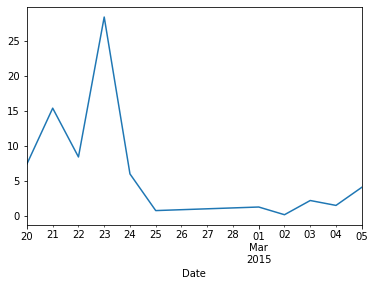

In [66]:
# 1. 加载源数据, 获取df对象.
city_day = pd.read_csv('data/city_day.csv', parse_dates=['Date'], index_col='Date') 
city_day.head()
# city_day.info()

# 2. 获取有空值的某一段数据, 方便我们演示.
city_day['Xylene'][50:64]

# 思路1: 用 空值的 上个值来填充. 
city_day['Xylene'].fillna(method='ffill')[50:64]
# city_day['Xylene'].fillna(method='ffill')[50:64].plot()     # 可视化, 查看下. 

# 思路2: 用 空值的 下个值来填充.
city_day['Xylene'].fillna(method='bfill')[50:64]
# city_day['Xylene'].fillna(method='bfill')[50:64].plot()

# 思路3: 线性填充, 即: 结合 前边 和 后边的值, 来推导出1个要填充的值.
# limit_direction参数有三个值:     both: 参考前边+后边数据, 推到出值.   forward: 只参考前边的值,  backward: 只参考后边的值
city_day['Xylene'].interpolate(limit_direction='both')[50:64]
city_day['Xylene'].interpolate(limit_direction='both')[50:64].plot()